# 1-NLP-Stres Tespiti

In [10]:
# Proje içinde ihtiyacımız olan Kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

from textblob import TextBlob
#her kelime pozitif veya negatif bir değer alır

#Dil tespit etmek için
from langdetect import detect

#Sentiment analiz yapmak için
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Resim eklemek için
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

## Veri Okuma ve İnceleme

In [11]:
df=pd.read_csv("stress.csv")

In [12]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.0,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,1.72,6.90,0.86,2.59,3.45,3.45,0.00,0.00,0.00,1.72,11.21,3.45,0.86,2.59,5.17,0.00,2.59,6.03,1.72,1.72,1.72,2.59,0.86,1.72,0.00,0.00,8.62,0.00,1.72,4.31,0.86,2.59,4.31,11.21,0.86,17.24,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.0,0.86,0.86,0.00,0.00,0.0,0.0,21.55,9.48,3.45,0.86,0.86,0.0,0.0,0.0,5.17,1.72,0.00,0.00,2.8571,2.6250,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.0,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,5.50,0.00,0.00,0.00,0.00,11.01,0.00,0.00,0.00,0.00,11.93,1.83,0.00,3.67,5.50,1.83,6.42,0.92,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.60,5.50,3.67,7.34,2.75,0.00,0.92,13.76,0.92,15.60,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.0,1.83,0.00,0.92,0.00,0.0,0.0,14.68,4.59,2.75,0.00,0.00,0.0,0.0,0.0,0.00,2.75,0.92,3.67,3.0000,2.8889,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.6,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,1.20,1.20,0.00,0.00,0.00,15.57,0.60,3.59,1.80,2.40,10.18,4.19,1.20,0.60,2.99,0.00,1.80,0.00,0.00,0.00,0.00,0.60,0.60,0.00,0.00,0.00,8.98,5.39,0.60,1.20,2.40,0.00,3.59,14.37,1.80,16.17,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.78,2.40,3.59,0.00,0.00,0.6,0.0,0.0,2.40,1.80,0.00,0.00,2.7143,3.0000,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,

1. **subreddit**: Metin maddesinin hangi subreddit (alt dizin) kategorisine ait olduğunu belirten sütun. Örneğin, "ptsd" veya "relationships" gibi subreddit isimleri.

2. **post_id**: Metin maddesinin benzersiz bir kimlik bilgisini içeren sütun. Her metin maddesi farklı bir post_id'ye sahiptir.

3. **sentence_range**: Metin maddesinin içindeki metin parçasının başlangıç ve bitiş indekslerini belirten sütun. Örneğin, "(15, 20)" bir metin parçasının 15. karakterden başlayıp 20. karakterde sona erdiğini gösterir.

4. **text**: Metin maddesinin kendisini içeren sütun. Analiz edilecek metin verisi burada bulunur.

5. **id**: Metin maddesine ait başka bir benzersiz kimlik bilgisini içeren sütun.

6. **label**: Metin maddesinin bir etiketi veya sınıflandırılması olduğunu belirten sütun. Bu, metin maddesinin bir tür kategoriye ait olduğunu gösterir.

7. **confidence**: Metin maddesinin etiketinin ne kadar güvenilir olduğunu gösteren bir güvenilirlik puanını içeren sütun.

8. **social_timestamp**: Metin maddesinin sosyal medya platformunda paylaşıldığı tarih ve zaman bilgisini içeren sütun.

9. **social_karma**: Metin maddesinin paylaşıldığı sosyal medya platformunda kullanıcının toplam puanını (karma) gösteren sütun.

10. **syntax_ari**: Metin maddesinin cümle yapısının karmaşıklığını değerlendiren Automated Readability Index (ARI) skorunu içeren sütun.

11. **lex_liwc_WC** ve sonraki sütunlar: Metin maddesinin içeriği ile ilgili dil özelliklerini (linguistic features) gösteren sütunlar. Özellikler arasında kelime sayısı, analitik özellikler, cümlenin tonu, cümlenin yapısı ve daha fazlası bulunur.

12. **lex_dal_max_pleasantness**, **lex_dal_max_activation** vb. sütunlar: Metin maddesinin içeriğiyle ilgili duygu durumunu ve diğer özellikleri gösteren sütunlar.

13. **social_upvote_ratio**: Metin maddesinin topluluk tarafından ne kadar olumlu bir şekilde karşılandığını gösteren bir oran sütunu.

14. **social_num_comments**: Metin maddesine yapılan yorumların sayısını gösteren sütun.

15. **syntax_fk_grade**: Cümlenin karmaşıklığını değerlendiren flesch-kincaid okuma düzeyi (Flesch-Kincaid readability grade level) sütunu.

16. **sentiment**: Metin maddesinin duygusal tonunu veya duygu durumunu belirten sütun. Bu, metnin olumlu, olumsuz veya tarafsız olduğunu gösterir.

In [14]:
df.shape

(2838, 116)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


## Veri Ön İşleme:

In [16]:
# Bize gerekli sutun metin ve etiketi:
df1 = df[['text', 'label']]

In [17]:
df1.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [19]:
# 0'ları stress yok 1'leri stres var olarak tanımlayacağız:
df1['label'] = df1['label'].apply(lambda x: "stress yok" if x == 0 else "stres var")

In [23]:
df1.sample(3)

,text,label
2643,She talked sarcastically about how my life is ...,stress yok
2520,"Update - Thanks all, I have calmed down a bit ...",stres var
1316,"She currently has a somewhat reliable car, and...",stress yok


## Veri Görselleştirmesi

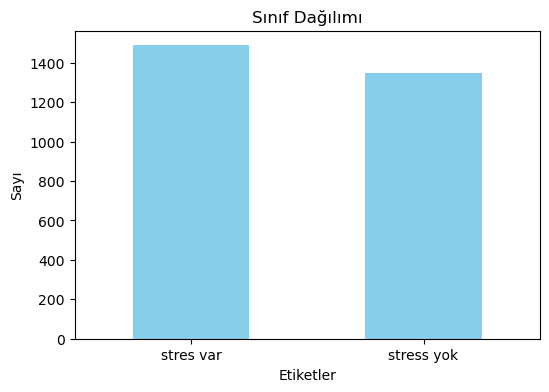

In [38]:
# Sınıf Dağılımı Görselleştirmesi (Sınıf Sayısının Çubuk Grafiği):
# Etiket sınıfı sayısını hesaplayın
class_counts = df1['label'].value_counts()

# Çubuk grafik oluşturun
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Sınıf Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.xticks(rotation=0)
plt.show()

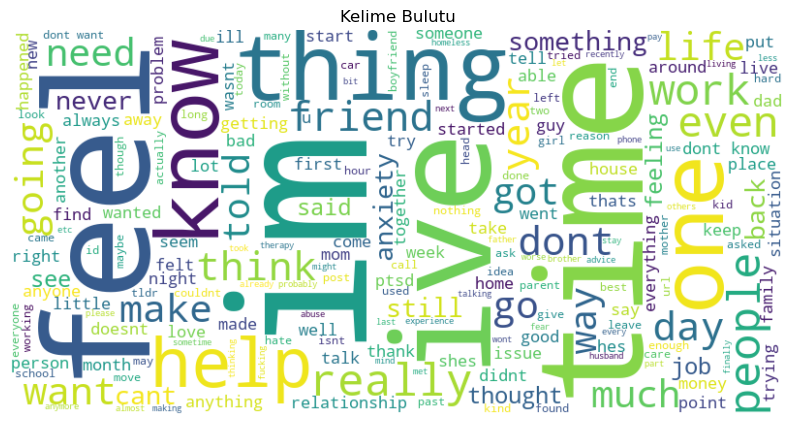

In [39]:
# Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Metin verilerinden bir kelime bulutu oluşturun
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['text']))

# Kelime bulutunu görüntüleyin
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kelime Bulutu')
plt.show()

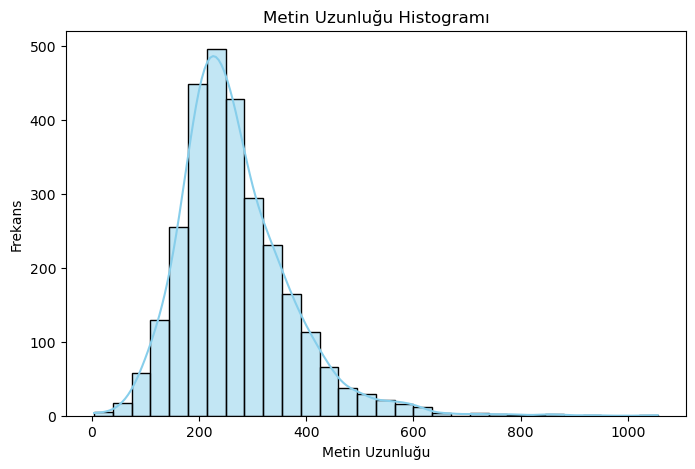

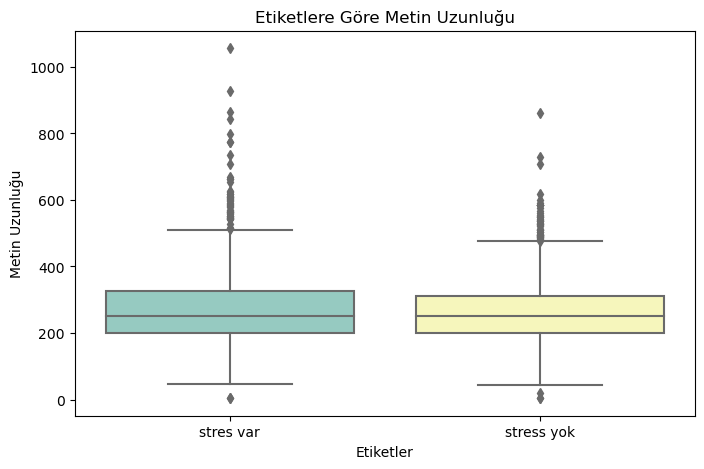

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Metinlerin uzunluğunu hesaplayın
df1['metin_uzunlugu'] = df1['text'].apply(len)

# Metin uzunluğu histogramı
plt.figure(figsize=(8, 5))
sns.histplot(df1['metin_uzunlugu'], bins=30, kde=True, color='skyblue')
plt.title('Metin Uzunluğu Histogramı')
plt.xlabel('Metin Uzunluğu')
plt.ylabel('Frekans')
plt.show()

# Etiketlere göre metin uzunluğu kutu grafiği
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='metin_uzunlugu', data=df1, palette='Set3')
plt.title('Etiketlere Göre Metin Uzunluğu')
plt.xlabel('Etiketler')
plt.ylabel('Metin Uzunluğu')
plt.show()


## Veri Düzenleme Devam
NLP projelerine başlamadan önce metin verilerinizi işlemek için bir dizi ön işleme adımı gerçekleştirmek önemlidir. Aşağıda bu adımları detaylı olarak açıklıyorum:

1. **Tüm Harfleri Küçük Harfe Çevirme**: Metin verilerindeki tüm harf karakterlerini küçük harfe çevirmek, metin verilerinin tutarlılığını sağlar ve büyük harfle başlayan ve küçük harfle başlayan kelimeleri aynı olarak kabul eder.

2. **Noktalama İşaretlerini Kaldırma**: Metin verilerinden noktalama işaretlerini kaldırmak, metin maddeyi temizlemeye yardımcı olur ve dil işleme algoritmalarının daha iyi çalışmasını sağlar. Örnekler: nokta (.), virgül (,), ünlem (!), soru işareti (?), tırnak işaretleri (' ve ").

3. **Rakamları Kaldırma**: Metin verilerinden rakamları kaldırmak da verileri temizlemeye yardımcı olur. Bu, metni analiz etmek için rakamların gerekli olmadığı durumlarda özellikle önemlidir.

4. **Satır Sonlarını Kaldırma**: Metin verilerindeki satır sonlarını veya yeni satırları kaldırmak, metin verilerini tek bir sürekli metin olarak birleştirmeye yardımcı olur.

5. **Gereksiz Kelimeleri Çıkartma (Stopwords)**: Dil işleme için genellikle anlam taşımayan, yaygın kullanılan kelimeleri (örneğin "ve", "ama", "veya") çıkartmak için bir stopwords listesi kullanılır. Bu, metin maddeyi temizlerken verilerin önemli kısımlarını korumanıza yardımcı olur.

6. **Tokenize Etme**: Metin verilerini kelime veya kelime gruplarına ayırmak için tokenizasyon yapılır. Tokenler, metin verilerini işlemek ve analiz etmek için kullanılan temel birimlerdir.

7. **Ekleri Kaldırma ve Kökleri Bulma (Lemma & Stemma)**: Dil işleme için metin verilerini daha basit bir forma dönüştürmek için lemmatizasyon veya stemming kullanabilirsiniz. Lemmatizasyon, kelimeleri köklerine dönüştürürken, stemming benzer kelimeleri daha basit bir köke indirir.

8. **Vektörleştirme**: Metin verilerini sayısal bir forma dönüştürmek için vektörleştirme yapılır. Bu, metin verilerini bir sayısal vektör temsilinde ifade etmek için teknikler içerir. TF-IDF (Term Frequency-Inverse Document Frequency) veya Word Embedding (örneğin Word2Vec, GloVe) gibi teknikler kullanılabilir.

Bu adımları takip ederek, metin verilerinizi NLP projeleri için hazır hale getirebilir ve bu veriler üzerinde makine öğrenimi veya derin öğrenme modelleri oluşturabilirsiniz. Bu ön işleme adımları, verilerinizin daha iyi anlaşılmasına ve daha iyi sonuçlar elde etmenize yardımcı olacaktır.

In [26]:
# 1-Küçük harfe çevir
df1['text']=df1['text'].str.lower()
# 2-Noktalama işaretleri kaldır
df1['text']=df1['text'].str.replace('[^\w\s]','')
# 3-Rakamları kaldır
df1['text']=df1['text'].str.replace('\d+','')
# 4-Satır sonu,\n enter a basılmışsa \r
df1['text']=df1['text'].str.replace('\n',' ').replace('\r','')

In [27]:
# Gereksiz Kelimeleri Çıkartma (Stopwords)
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df1['text']=df1['text'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

In [31]:
# Tokenize Etme
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df1['tokenized']=[tokenizer.tokenize(i) for i in df1['text'].values]

Bu kod, metin madde analizi veya dil işleme projeleri için metin verilerini daha küçük ve işlenmesi daha kolay parçalara ayırmak amacıyla kullanılır. Bu tokenleştirme işlemi, metin verilerinin daha sonra kelime frekansı hesaplaması, duygu analizi veya sınıflandırma gibi NLP görevlerinde kullanılmasını kolaylaştırır.

In [32]:
# Ekleri Kaldırma ve Kökleri Bulma (Lemma & Stemma)
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df1['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df1['text'].values]

In [33]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [34]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

1. İlk olarak, `from nltk.stem import PorterStemmer` satırıyla NLTK kütüphanesindeki `PorterStemmer` sınıfını içe aktarıyoruz. Porter stemming algoritması, kelimenin kökünü bulmak için kullanılır ve lemmatizasyon gibi kelime formu düzenleme işlemi yapar.

2. `pr = PorterStemmer()` satırıyla bir `PorterStemmer` örneği oluşturuyoruz. Bu örnek, kelime köklerini (stem) bulmak için kullanılacak.

3. `def lemmafn(text):` ile başlayan bu kod, bir metin dizisi (text) alan bir işlev (fonksiyon) tanımlar.

4. `words = TextBlob(text).words` satırıyla, TextBlob kütüphanesini kullanarak metni kelimelere ayırıyoruz. TextBlob, metin işleme işlemlerini kolaylaştıran bir Python kütüphanesidir.

5. `return [pr.stem(word) for word in words]` satırı, her bir kelimeyi `PorterStemmer` kullanarak kök haline getirir ve köklerin bulunduğu bir liste döndürür.

Bu kod parçacığı, metin verilerindeki kelimeleri köklerine indirgemek için kullanılır. Kök indirgeme, kelimelerin temel anlamını koruyarak metin analizi ve dil işleme projeleri için kullanışlı olabilir. Kök halindeki kelimeler, kelime varyasyonlarından arındırılmış şekilde analiz edilir.

In [42]:
# Vektörleştirme
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

## Modelleme

In [43]:
x=df1.text
y=df1.label

In [44]:
x=vect.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [46]:
l=LogisticRegression()
d=DecisionTreeClassifier()

In [47]:
l.fit(x_train,y_train)

LogisticRegression()

In [48]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
pred=l.predict(x_test)

In [50]:
accuracy_score(pred,y_test)

0.7230046948356808

In [51]:
pred1=d.predict(x_test)

In [52]:
accuracy_score(pred1,y_test)

0.6572769953051644

In [53]:
mb=MultinomialNB()

In [54]:
mb.fit(x_train,y_train)

MultinomialNB()

In [55]:
pred2=mb.predict(x_test)

In [56]:
accuracy_score(pred2,y_test)

0.7676056338028169

### Genel algoritma

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Veriyi hazırla
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Özellik sayısını ayarlayabilirsiniz
x = tfidf_vectorizer.fit_transform(df1['text'])

# Sınıf etiketlerini sayısal değerlere dönüştür
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['label'])

# Veriyi eğitim ve test kümesine ayır
x_train, x_test, y_train, y_test = train_test_split(x.toarray(), y, random_state=42, test_size=0.15)

# Sınıflandırma modellerini tanımla
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBClassifier': XGBClassifier()
}

# Modelleri değerlendir
results = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)

# Sonuçları bir DataFrame'e dök
results_df = pd.DataFrame(results)

# Sonuçları doğruluk (accuracy) sırasına göre sırala
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Sonuçları yazdır
print(results_df)

                    Model  Accuracy
1             BernoulliNB  0.744131
6      LogisticRegression  0.725352
2                     SVC  0.713615
0              GaussianNB  0.687793
5  RandomForestClassifier  0.685446
7           XGBClassifier  0.673709
3    KNeighborsClassifier  0.636150
4  DecisionTreeClassifier  0.612676


## Modeli Deneme:

In [80]:
# Öğrenilmiş modeli kullanarak tahminler yap
user_text = input("Enter a Text: ")
user_data = tfidf_vectorizer.transform([user_text]).toarray()  # Kullanıcının girdisini özelliklere dönüştür
predicted_label = model.predict(user_data)  # Tahmin yap

# Tahmin sonucunu yazdır
if predicted_label[0] == 0:
    print("Prediction: stress yok")
else:
    print("Prediction: stres var")

Enter a Text: I am very happy today
Prediction: stres var


### Yukarıdaki model fazla başarılı olmadı 

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from nltk.stem import PorterStemmer
from textblob import TextBlob

# Önceden tanımlanmış veri çerçevesi (df1) ve modeli (model) varsayalım.

# Veriyi hazırla
def lemmafn(text):
    words = TextBlob(text).words
    pr = PorterStemmer()
    return " ".join([pr.stem(word) for word in words])

vect = CountVectorizer(stop_words="english", ngram_range=(1, 2), max_features=10000, analyzer=lemmafn)
x = df1.text
y = df1.label
x = vect.fit_transform(x)

# Sınıf etiketlerini sayısal değerlere dönüştür
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Eğitilmiş bir model (örneğin, Gaussian Naive Bayes) varsayalım
model = GaussianNB()
model.fit(x.toarray(), y)

# Kullanıcıdan bir metin girdisi al
user_text = input("Enter a Text: ")

# Kullanıcının girdisini özelliklere dönüştür
user_data = vect.transform([lemmafn(user_text)]).toarray()

# Tahmin yap
predicted_label = model.predict(user_data)

# Tahmin sonucunu yazdır
if predicted_label[0] == 0:
    print("Prediction: stress yok")
else:
    print("Prediction: stres var")

Enter a Text: I am very happy today
Prediction: stress yok


In [82]:
# Kullanıcıdan bir metin girdisi al
user_text = input("Enter a Text: ")
user_data = vect.transform([lemmafn(user_text)]).toarray()
predicted_label = model.predict(user_data)
if predicted_label[0] == 0:
    print("Prediction: stress yok")
else:
    print("Prediction: stres var")

Enter a Text: This assignment kisses your hands.
Prediction: stres var


In [ ]:
# Bu modelimiz Başarılı

## Sonuç olarak:
Veri dosyamızı inceledikten sonra bazı değişiklikler yaptık ve lazım olan verileri aldık, boş veri olmadığı için doldurmadık, veri daha iyi anlamak adına bazı görselleştirmeler yaptık. NLP projelerinde modelle yapmadan önce modelin iyi çalışması için yapılması gereken bazı adımları uyguladık. Modelimi yazı ve tiket olarak Classificaiton algoritmalarımıza tanımladık. Nihayetinde modelimizin Metinimizden ve etiketimizden anladığı kadarıyla stresli ve stressiz cümleleri anlamış olduk.